In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("results.csv")
df = df[df['world_size'] == 16]
avg_throughput_by_kind_size = df.groupby(["kind", "size"])["average_throughput"].mean().reset_index()

# Pivot the table to have kinds as columns and sizes as rows
pivot_table = avg_throughput_by_kind_size.pivot(index="size", columns="kind", values="average_throughput")

# Calculate performance gains
pivot_table["PerformanceGain"] = (pivot_table["pfs"] - pivot_table["minio"]) / pivot_table["minio"] * 100


# Create a Seaborn line plot
plt.figure(figsize=(10, 6))

# Plot two separate curves for each "kind"
sns.lineplot(data=pivot_table, x="size", y="PerformanceGain")

# Set labels and title
#plt.yscale("log")
plt.xlabel("Size")
plt.ylabel("Performance gain [%]")
plt.title("Performance gain vs. Size (n=1)")

# Show the legend
plt.legend(title="Kind")

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results.csv'

/tmp/ipykernel_905880/3007784865.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'pfs'] = "PFS"
/tmp/ipykernel_905880/3007784865.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'minio'] = "MinIO"


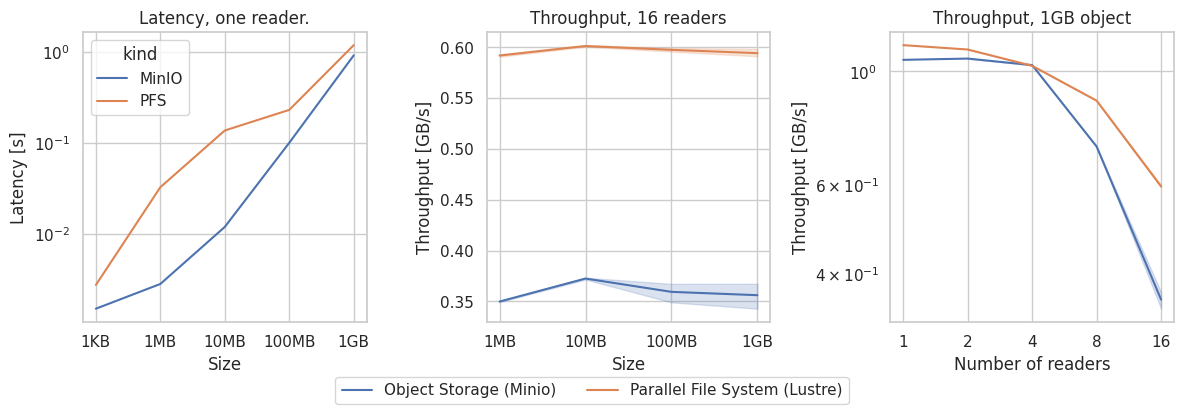

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,2)})
            
sns.set_style("whitegrid")

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("../data/faas_io/read.csv")
df['kind'][df['kind'] == 'pfs'] = "PFS"
df['kind'][df['kind'] == 'minio'] = "MinIO"
df2 = df.copy()
df3 = df.copy()
df = df[df['size'].isin(["1KB", "1MB", "10MB", "100MB", "1GB"])]
df = df[df['world_size'] == 1]
df3 = df3[df3['world_size'] == 16]
df3 = df3[df3['size'].isin(["1MB", "10MB", "100MB", "1GB"])]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

tmp = axs[0]
axs[0] = axs[1]
axs[1] = tmp

# Plot the first curve in the first subplot
df3["average_throughput"] /= 1000 * 1000 * 1000
sns.lineplot(data=df3, x="size", y="average_throughput", hue="kind", ax=axs[0])
#axs[0].set_ylim([0*,7])
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Throughput [GB/s]")
axs[0].set_title("Throughput, 16 readers")
axs[0].legend(title="Kind").set_visible(False)

# Plot latency in the second subplot
sns.lineplot(data=df, x="size", y="latency", hue="kind", ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Latency [s]")
axs[1].set_title("Latency, one reader.")
handles, labels = axs[1].get_legend_handles_labels()
#axs[1].legend(handles, ["Object Storage (Minio)", "Parallel File System (Lustre)"],title="I/O System", ncol=2,
             #bbox_to_anchor=(2, -0.5))
#axs[1].legend(title="Kind").set_visible(False)  # Hide the legend in this subplot

# Plot average throughput against "world_size" in the third subplot
df2 = df2[df2['size'] == "1GB"]
df2["average_throughput"] /= 1000 * 1000 * 1000
df2['world_size'] = df2['world_size'].astype(str)
sns.lineplot(data=df2, x="world_size", y="average_throughput", hue="kind", ax=axs[2])
axs[2].set_yscale("log")
axs[2].set_xlabel("Number of readers")
axs[2].set_ylabel("Throughput [GB/s]")
axs[2].set_title("Throughput, 1GB object")
#axs[2].legend(title="Kind")
axs[2].legend(title="Kind").set_visible(False)

plt.figlegend(handles, ["Object Storage (Minio)", "Parallel File System (Lustre)"], bbox_to_anchor=(0.5, -0.05), loc = 'lower center', ncol=2, labelspacing=0.)

# Adjust the layout of subplots
plt.tight_layout()

# Display the figure
plt.show()
import os
fig.savefig(os.path.join('plots', 'faas_io.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)
fig.savefig(os.path.join('plots', 'faas_io.png'),bbox_inches='tight',pad_inches = 0, transparent=False)

/tmp/ipykernel_905880/1025109356.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'pfs'] = "PFS"
/tmp/ipykernel_905880/1025109356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'minio'] = "MinIO"


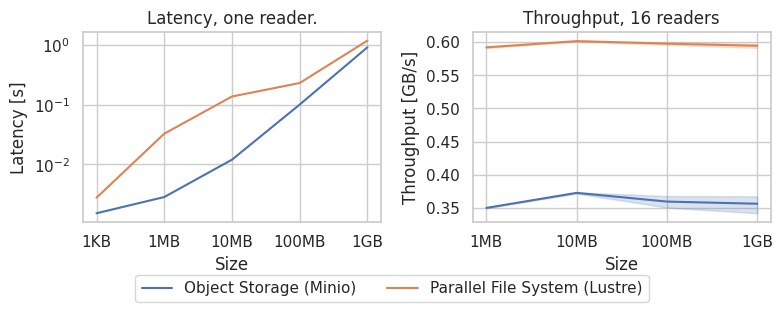

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,2)})
            
sns.set_style("whitegrid")

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("../data/faas_io/read.csv")
df['kind'][df['kind'] == 'pfs'] = "PFS"
df['kind'][df['kind'] == 'minio'] = "MinIO"
df2 = df.copy()
df3 = df.copy()
df = df[df['size'].isin(["1KB", "1MB", "10MB", "100MB", "1GB"])]
df = df[df['world_size'] == 1]
df3 = df3[df3['world_size'] == 16]
df3 = df3[df3['size'].isin(["1MB", "10MB", "100MB", "1GB"])]

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

tmp = axs[0]
axs[0] = axs[1]
axs[1] = tmp

# Plot the first curve in the first subplot
df3["average_throughput"] /= 1000 * 1000 * 1000
sns.lineplot(data=df3, x="size", y="average_throughput", hue="kind", ax=axs[0])
#axs[0].set_ylim([0*,7])
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Throughput [GB/s]")
axs[0].set_title("Throughput, 16 readers")
axs[0].legend(title="Kind").set_visible(False)

# Plot latency in the second subplot
sns.lineplot(data=df, x="size", y="latency", hue="kind", ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Latency [s]")
axs[1].set_title("Latency, one reader.")
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(title="Kind").set_visible(False)
#axs[1].legend(handles, ["Object Storage (Minio)", "Parallel File System (Lustre)"],title="I/O System", ncol=2,
             #bbox_to_anchor=(2, -0.5))
#axs[1].legend(title="Kind").set_visible(False)  # Hide the legend in this subplot


plt.figlegend(handles, ["Object Storage (Minio)", "Parallel File System (Lustre)"], bbox_to_anchor=(0.5, -0.06), loc = 'lower center', ncol=2, labelspacing=0.)

# Adjust the layout of subplots
plt.tight_layout()

# Display the figure
plt.show()
import os
fig.savefig(os.path.join('plots', 'faas_io2.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)
fig.savefig(os.path.join('plots', 'faas_io2.png'),bbox_inches='tight',pad_inches = 0, transparent=False)

/tmp/ipykernel_905880/1642686951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'pfs'] = "PFS"
/tmp/ipykernel_905880/1642686951.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kind'][df['kind'] == 'minio'] = "MinIO"
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


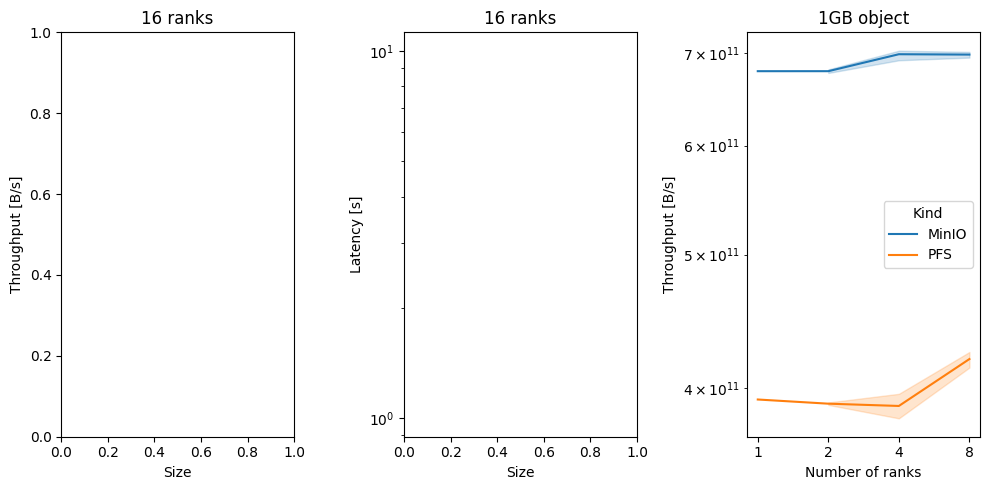

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("../data/faas_io/write.csv")
df['kind'][df['kind'] == 'pfs'] = "PFS"
df['kind'][df['kind'] == 'minio'] = "MinIO"
df2 = df.copy()
df3 = df.copy()
df = df[df['world_size'] == 16]
df3 = df3[df3['world_size'] == 16]
df3 = df3[df3['size'].isin(["1MB", "10MB", "100MB", "1GB"])]

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first curve in the first subplot
sns.lineplot(data=df3, x="size", y="average_throughput", hue="kind", ax=axs[0])
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Throughput [B/s]")
axs[0].set_title("16 ranks")
axs[0].legend(title="Kind").set_visible(False)

# Plot latency in the second subplot
sns.lineplot(data=df, x="size", y="latency", hue="kind", ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Latency [s]")
axs[1].set_title("16 ranks")
axs[1].legend(title="Kind").set_visible(False)  # Hide the legend in this subplot

# Plot average throughput against "world_size" in the third subplot
df2 = df2[df2['size'] == "1GB"]
df2['world_size'] = df2['world_size'].astype(str)
sns.lineplot(data=df2, x="world_size", y="average_throughput", hue="kind", ax=axs[2])
axs[2].set_yscale("log")
axs[2].set_xlabel("Number of ranks")
axs[2].set_ylabel("Throughput [B/s]")
axs[2].set_title("1GB object")
axs[2].legend(title="Kind")

# Adjust the layout of subplots
plt.tight_layout()

# Display the figure
plt.show()


/home/altair/Repos/api_venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


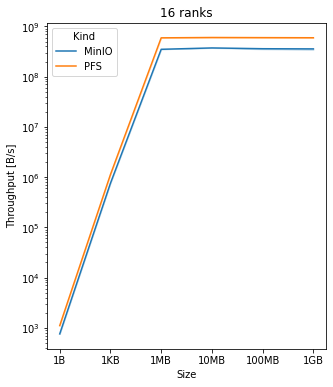

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("results.csv")
df = df[df['world_size'] == 16]
df['kind'][df['kind'] == 'pfs'] = "PFS"
df['kind'][df['kind'] == 'minio'] = "MinIO"

# Create a Seaborn line plot
plt.figure(figsize=(5, 6))

# Plot two separate curves for each "kind"
sns.lineplot(data=df, x="size", y="average_throughput", hue="kind")

# Set labels and title
plt.yscale("log")
plt.xlabel("Size")
plt.ylabel("Throughput [B/s]")
plt.title("16 ranks")

# Show the legend
plt.legend(title="Kind")

# Display the plot
plt.show()

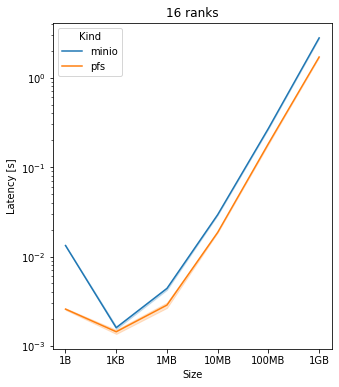

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("results.csv")
df = df[df['world_size'] == 16]

# Create a Seaborn line plot
plt.figure(figsize=(5, 6))

# Plot two separate curves for each "kind"
sns.lineplot(data=df, x="size", y="latency", hue="kind")

# Set labels and title
plt.yscale("log")
plt.xlabel("Size")
plt.ylabel("Latency [s]")
plt.title("16 ranks")

# Show the legend
plt.legend(title="Kind")

# Display the plot
plt.show()

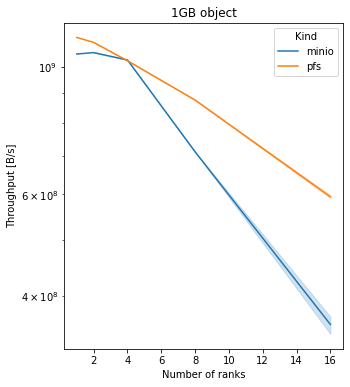

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("results.csv")
df = df[df['size'] == "1GB"]

# Create a Seaborn line plot
plt.figure(figsize=(5, 6))

# Plot two separate curves for each "kind"
sns.lineplot(data=df, x="world_size", y="average_throughput", hue="kind")

# Set labels and title
plt.yscale("log")
plt.xlabel("Number of ranks")
plt.ylabel("Throughput [B/s]")
plt.title("1GB object")

# Show the legend
plt.legend(title="Kind")

# Display the plot
plt.show()

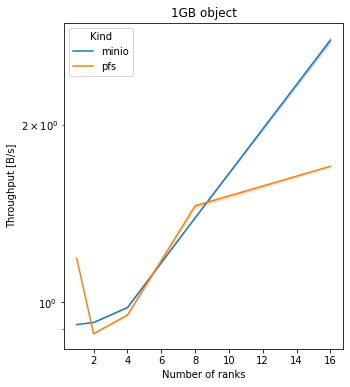

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("read.csv")
df = df[df['size'] == "1GB"]

# Create a Seaborn line plot
plt.figure(figsize=(5, 6))

# Plot two separate curves for each "kind"
sns.lineplot(data=df, x="world_size", y="latency", hue="kind")

# Set labels and title
plt.yscale("log")
plt.xlabel("Number of ranks")
plt.ylabel("Throughput [B/s]")
plt.title("1GB object")

# Show the legend
plt.legend(title="Kind")

# Display the plot
plt.show()